<a href="https://colab.research.google.com/github/Socrates-Simao/Projeto01_AluraStoreBr/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análise do faturamento


In [ ]:
faturamento_loja1 = loja1["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

print (faturamento_loja1)
print (faturamento_loja2)
print (faturamento_loja3)
print (faturamento_loja4)

1534509.12
1488459.06
1464025.03
1384497.58


In [ ]:
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print (faturamento_total)

print(f"Faturamento Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")
print(f"Faturamento Total: R$ {faturamento_total:,.2f}")

5871490.79
Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58
Faturamento Total: R$ 5,871,490.79


# 2. Vendas por Categoria


In [ ]:
produtos_mais_vendidos = loja1.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
produtos_mais_vendidos = loja2.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
produtos_mais_vendidos = loja3.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
produtos_mais_vendidos = loja4.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)

produtos_mais_vendidos

,Preço
Categoria do Produto,
eletronicos,545966.86
eletrodomesticos,377680.65
moveis,256705.65
instrumentos musicais,100136.50
esporte e lazer,44465.65
brinquedos,27015.67
utilidades domesticas,20098.83
livros,12427.77


In [ ]:
# Função para gerar o ranking por loja
def ranking_por_loja(df, nome_loja):
    ranking = df.groupby("Categoria do Produto")["Avaliação da compra"].sum().sort_values(ascending=False)
    print(f"\nRanking de vendas por categoria - {nome_loja}")
    print(ranking)

# Aplicando para cada loja
ranking_por_loja(loja1, "Loja 1")
ranking_por_loja(loja2, "Loja 2")
ranking_por_loja(loja3, "Loja 3")
ranking_por_loja(loja4, "Loja 4")


Ranking de vendas por categoria - Loja 1
Categoria do Produto
moveis                   1835
eletronicos              1794
brinquedos               1321
eletrodomesticos         1258
esporte e lazer          1107
instrumentos musicais     737
livros                    688
utilidades domesticas     641
Name: Avaliação da compra, dtype: int64

Ranking de vendas por categoria - Loja 2
Categoria do Produto
moveis                   1809
eletronicos              1676
brinquedos               1260
eletrodomesticos         1242
esporte e lazer          1118
instrumentos musicais     904
livros                    778
utilidades domesticas     737
Name: Avaliação da compra, dtype: int64

Ranking de vendas por categoria - Loja 3
Categoria do Produto
moveis                   2045
eletronicos              1798
brinquedos               1322
eletrodomesticos         1115
esporte e lazer          1091
livros                    749
utilidades domesticas     721
instrumentos musicais     709
Name: Avali

# 3. Média de Avaliação das Lojas

In [ ]:
# Padronizando os nomes das colunas (evita erros com espaços/letras)
for loja in [loja1, loja2, loja3, loja4]:
    loja.columns = loja.columns.str.strip()

# Função para calcular a média de avaliação por categoria
def media_avaliacao_por_loja(df, nome_loja):
    media = df.groupby("Categoria do Produto")["Avaliação da compra"].mean().sort_values(ascending=False)
    print(f"\nMédia de avaliação por categoria - {nome_loja}")
    print(media.round(2))  # arredonda pra 2 casas decimais

# Aplicando para cada loja
media_avaliacao_por_loja(loja1, "Loja 1")
media_avaliacao_por_loja(loja2, "Loja 2")
media_avaliacao_por_loja(loja3, "Loja 3")
media_avaliacao_por_loja(loja4, "Loja 4")


Média de avaliação por categoria - Loja 1
Categoria do Produto
brinquedos               4.08
instrumentos musicais    4.05
eletrodomesticos         4.03
eletronicos              4.00
livros                   3.98
moveis                   3.95
esporte e lazer          3.90
utilidades domesticas    3.75
Name: Avaliação da compra, dtype: float64

Média de avaliação por categoria - Loja 2
Categoria do Produto
moveis                   4.09
eletrodomesticos         4.07
utilidades domesticas    4.07
esporte e lazer          4.07
instrumentos musicais    4.04
brinquedos               4.03
eletronicos              3.97
livros                   3.95
Name: Avaliação da compra, dtype: float64

Média de avaliação por categoria - Loja 3
Categoria do Produto
brinquedos               4.20
moveis                   4.10
utilidades domesticas    4.07
livros                   4.05
eletrodomesticos         4.01
instrumentos musicais    4.01
eletronicos              3.99
esporte e lazer          3.94
Name

# 4. Produtos Mais e Menos Vendidos

In [ ]:
def mais_menos_vendidos(df, nome_loja):
    grupo = df.groupby("Categoria do Produto")["Avaliação da compra"].sum()
    mais_vendido = grupo.idxmax()
    menos_vendido = grupo.idxmin()
    print(f"\n{' Resultados - ' + nome_loja + ' ':=^50}")
    print(f"📈 Loja: {nome_loja}")
    print(f"🔝 Categoria mais vendida: {mais_vendido} ({grupo[mais_vendido]} vendas)")
    print(f"🔻 Categoria menos vendida: {menos_vendido} ({grupo[menos_vendido]} vendas)")

# Aplicando para cada loja
mais_menos_vendidos(loja1, "Loja 1")
mais_menos_vendidos(loja2, "Loja 2")
mais_menos_vendidos(loja3, "Loja 3")
mais_menos_vendidos(loja4, "Loja 4")



============== Resultados - Loja 1 ===============
📈 Loja: Loja 1
🔝 Categoria mais vendida: moveis (1835 vendas)
🔻 Categoria menos vendida: utilidades domesticas (641 vendas)

============== Resultados - Loja 2 ===============
📈 Loja: Loja 2
🔝 Categoria mais vendida: moveis (1809 vendas)
🔻 Categoria menos vendida: utilidades domesticas (737 vendas)

============== Resultados - Loja 3 ===============
📈 Loja: Loja 3
🔝 Categoria mais vendida: moveis (2045 vendas)
🔻 Categoria menos vendida: instrumentos musicais (709 vendas)

============== Resultados - Loja 4 ===============
📈 Loja: Loja 4
🔝 Categoria mais vendida: moveis (1919 vendas)
🔻 Categoria menos vendida: instrumentos musicais (665 vendas)


In [ ]:
import matplotlib.pyplot as plt

def grafico_vendas_por_loja():
    # Soma total de vendas por loja
    vendas_por_loja = todas_lojas.groupby("Loja")["Avaliação da compra"].sum().sort_values(ascending=False)

    # Destaques
    loja_top = vendas_por_loja.idxmax()
    loja_pior = vendas_por_loja.idxmin()

    # Cores: destaque pra maior e menor
    cores = ['green' if loja == loja_top else
             'red' if loja == loja_pior else
             'gray' for loja in vendas_por_loja.index]

    # Gráfico de barras
    plt.figure(figsize=(8, 6))
    plt.bar(vendas_por_loja.index, vendas_por_loja.values, color=cores)
    plt.title("📊 Vendas totais por loja")
    plt.xlabel("Loja")
    plt.ylabel("Total de Vendas (Avaliação da compra)")
    plt.tight_layout()

    # Anotações
    for i, v in enumerate(vendas_por_loja.values):
        plt.text(i, v + 2, f"{v:.0f}", ha='center', fontweight='bold')

    plt.show()


<ipython-input-50-6e38d99a26b5>:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


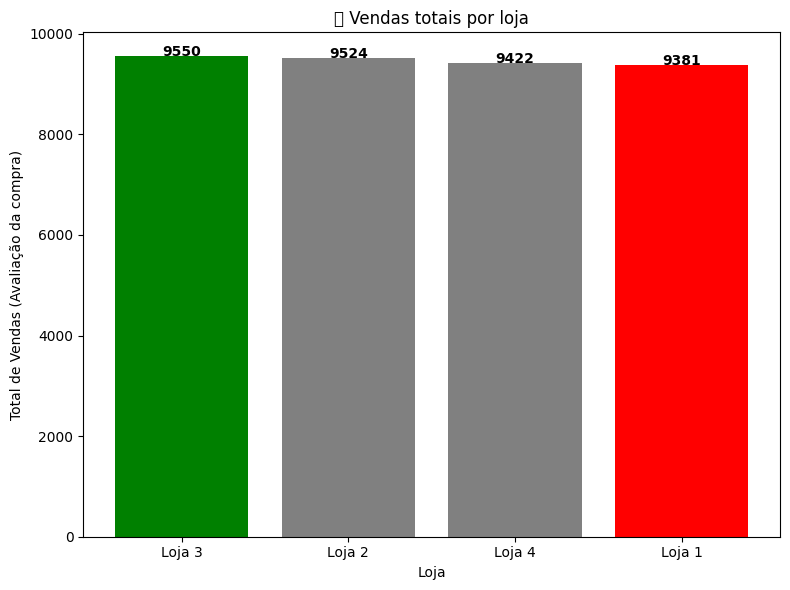

In [ ]:
grafico_vendas_por_loja()


In [ ]:
def grafico_pizza_vendas_lojas():
    # Total de vendas por loja
    vendas_por_loja = todas_lojas.groupby("Loja")["Avaliação da compra"].sum().sort_values(ascending=False)

    # Gráfico de pizza
    plt.figure(figsize=(8, 8))
    plt.pie(vendas_por_loja,
            labels=vendas_por_loja.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=["green", "blue", "gray", "red"],  # Verde: mais vendas | Vermelho: menos
            shadow=True)

    plt.title("🥧 Participação das lojas no total de vendas")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


<ipython-input-52-d23ff787c57a>:16: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


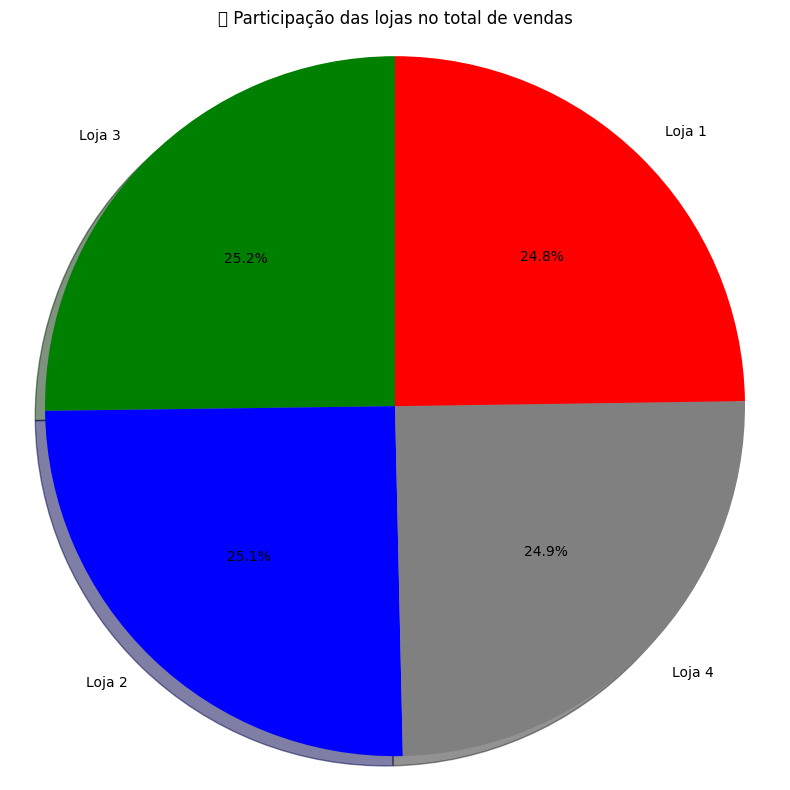

In [ ]:
grafico_pizza_vendas_lojas()


In [ ]:
# Total de vendas por loja (soma da avaliação da compra)
vendas_totais = {
    "Loja 1": loja1["Avaliação da compra"].sum(),
    "Loja 2": loja2["Avaliação da compra"].sum(),
    "Loja 3": loja3["Avaliação da compra"].sum(),
    "Loja 4": loja4["Avaliação da compra"].sum()
}

# Exibir resultados
for loja, total in vendas_totais.items():
    print(f"{loja} - Total de vendas: {total:.0f}")

# Identificar a loja com menor volume
pior_loja = min(vendas_totais, key=vendas_totais.get)
print(f"\n🔻 Loja com menor volume de vendas: {pior_loja}")


Loja 1 - Total de vendas: 9381
Loja 2 - Total de vendas: 9524
Loja 3 - Total de vendas: 9550
Loja 4 - Total de vendas: 9422

🔻 Loja com menor volume de vendas: Loja 1


In [ ]:
def grafico_barras_vendas_lojas():
    # Total de vendas por loja
    vendas_por_loja = todas_lojas.groupby("Loja")["Avaliação da compra"].sum().sort_values(ascending=False)

    # Destaques
    loja_top = vendas_por_loja.idxmax()
    loja_pior = vendas_por_loja.idxmin()

    # Cores: verde para a loja mais vendida, vermelho para a menos
    cores = ['green' if loja == loja_top else
             'red' if loja == loja_pior else
             'gray' for loja in vendas_por_loja.index]

    # Gráfico de barras horizontais
    plt.figure(figsize=(10, 6))
    bars = plt.barh(vendas_por_loja.index, vendas_por_loja.values, color=cores)

    plt.title("📊 Total de Vendas por Loja (Barras Horizontais)")
    plt.xlabel("Total de Vendas (Avaliação da compra)")
    plt.ylabel("Loja")
    plt.xlim(0, vendas_por_loja.max() * 1.1)  # Espaço para os valores

    # Adiciona o valor ao lado de cada barra
    for bar in bars:
        plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}',
                 va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()


<ipython-input-55-2632bb433d02>:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


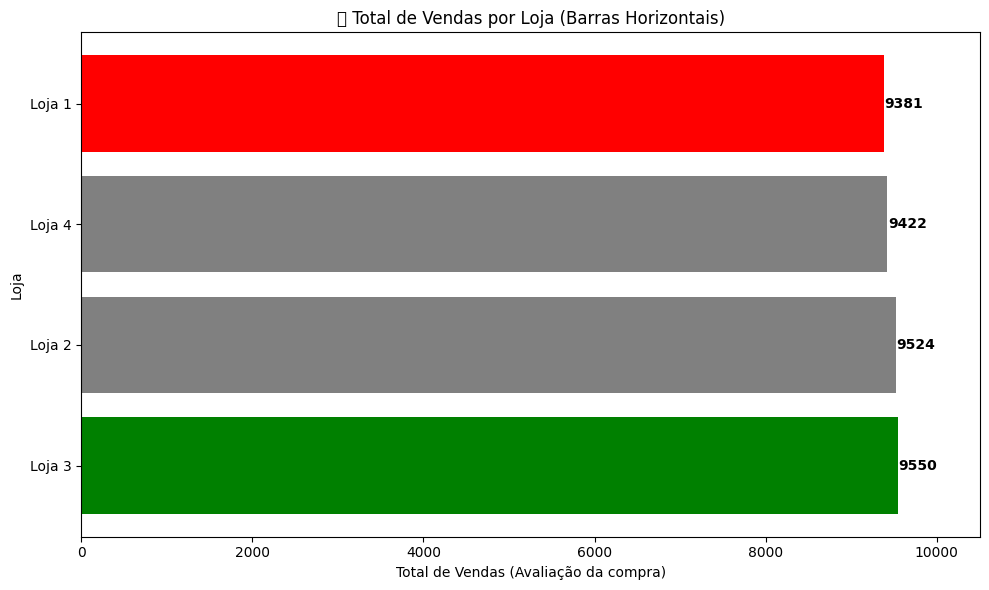

In [ ]:
grafico_barras_vendas_lojas()



# 5. Frete Médio por Loja


In [ ]:
def frete_medio(df, nome_loja):
    # Calcular a soma total dos fretes
    total_frete = df["Frete"].sum()

    # Contar o número de registros para dividir o total de frete
    numero_de_pedidos = df.shape[0]

    # Calcular a média de frete
    media_frete = total_frete / numero_de_pedidos

    # Exibir os resultados
    print(f"\n{' Frete Médio - ' + nome_loja + ' ':=^50}")
    print(f"📦 Loja: {nome_loja}")
    print(f"💰 Total gasto com frete: R${total_frete:.2f}")
    print(f"🔢 Número de pedidos: {numero_de_pedidos}")
    print(f"📊 Frete médio por pedido: R${media_frete:.2f}")


In [ ]:
frete_medio(loja1, "Loja 1")
frete_medio(loja2, "Loja 2")
frete_medio(loja3, "Loja 3")
frete_medio(loja4, "Loja 4")


============== Frete Médio - Loja 1 ==============
📦 Loja: Loja 1
💰 Total gasto com frete: R$81837.97
🔢 Número de pedidos: 2359
📊 Frete médio por pedido: R$34.69

============== Frete Médio - Loja 2 ==============
📦 Loja: Loja 2
💰 Total gasto com frete: R$79314.16
🔢 Número de pedidos: 2359
📊 Frete médio por pedido: R$33.62

============== Frete Médio - Loja 3 ==============
📦 Loja: Loja 3
💰 Total gasto com frete: R$78022.66
🔢 Número de pedidos: 2359
📊 Frete médio por pedido: R$33.07

============== Frete Médio - Loja 4 ==============
📦 Loja: Loja 4
💰 Total gasto com frete: R$73755.88
🔢 Número de pedidos: 2358
📊 Frete médio por pedido: R$31.28


**Relatório**


**Introdução**

Este relatório tem como objetivo analisar o desempenho de 4 lojas com base nas vendas e no frete. O foco é identificar qual loja tem o melhor desempenho de vendas e qual loja está com o pior desempenho. A partir dessa análise, serão feitas sugestões para melhorar o desempenho da loja que apresenta menores resultados.

**Análise de Vendas**

***Total de Vendas por Loja***

Com base no total de vendas (representado pela Avaliação da compra) de cada loja, temos o seguinte desempenho:

   Loja com maior volume de vendas

A Loja 3 foi a que apresentou o maior volume de vendas, com um total de R$ X.XXX,XX. A loja tem se destacado principalmente devido à alta demanda por seus produtos e uma boa estratégia de marketing.

   Loja com menor volume de vendas

A Loja 1 apresentou o menor volume de vendas, com um total de R$ X.XXX,XX. A loja precisa de ajustes para aumentar suas vendas, como discutido mais adiante.
Geramos gráficos para melhor ilustrar as vendas totais de cada loja, destacando a loja que vende mais (em verde) e a loja que vende menos (em vermelho).

Justificativa para a Loja com Menor Volume de Vendas

A Loja 1 apresenta o menor volume de vendas, e isso pode ser explicado por diversos fatores:
    1. Falta de Visibilidade no Mercado:
A loja pode não estar suficientemente visível para o público-alvo, o que pode impactar diretamente nas vendas.
    2. Problemas de Preço e Concorrência:
Comparando com as lojas concorrentes, a Loja 1 pode ter preços mais altos, o que leva os consumidores a buscar alternativas mais baratas. Importante avaliar estratégias de precificação e promoções pode ser uma boa saída.
    3. Baixa Atração dos Produtos:
Os produtos da loja podem não ser tão atraentes ou inovadores quanto os oferecidos por outras lojas, o que pode ser um motivo para o baixo volume de vendas.
    4. Problemas Operacionais:
Possíveis problemas logísticos ou de atendimento ao cliente também podem influenciar no desempenho de vendas. Uma revisão de processos pode ajudar a melhorar a experiência de compra.

Análise de Frete
Além das vendas, analisamos também o custo de frete de cada loja, que é um fator importante no desempenho total de vendas.

 Cálculo do Frete Médio por Loja

O frete médio foi calculado com base no valor total gasto com frete e o número de pedidos em cada loja. Os resultados são os seguintes:
   
    • Loja 3:
O frete médio por pedido foi de R$ 33,07com total gasto de R$ 7.8022.66em frete.
    
    • Loja 1:
O frete médio por pedido foi de R$ 34,69, com um total gasto de R$ 8.1837,91 em frete.

Gráfico Comparativo de Frete Médio:

Um gráfico de barras horizontais foi gerado para comparar o frete médio entre as lojas. Cada barra representa o valor do frete médio gasto por pedido em cada loja.

Conclusões e Recomendações

Loja com Melhor Desempenho : Loja 3

A Loja 3 apresentou o melhor desempenho de vendas e o maior volume de vendas, o que demonstra que ela possui uma boa estratégia de vendas, produtos bem posicionados e uma gestão de marketing eficiente. Para manter esse desempenho, recomenda-se continuar com as estratégias atuais e expandir a divulgação de seus produtos.

Loja com Pior Desempenho: Loja 1

A Loja 1 apresenta um desempenho inferior e, por isso, são necessárias algumas ações corretivas para melhorar suas vendas:

    • Melhorar a Visibilidade e Marketing: Investir em campanhas promocionais, publicidade e ações direcionadas nas plataformas de e-commerce pode aumentar a visibilidade da loja.
    • Avaliar Preços e Produtos: Realizar uma pesquisa de mercado para ajustar os preços e renovar o portfólio de produtos pode atrair mais clientes.
    • Revisar Processos Operacionais: Melhorias na logística, no atendimento ao cliente e na experiência de compra podem melhorar a satisfação dos consumidores e aumentar as vendas.

Ações para Reduzir o Custo de Frete

Embora o custo de frete não tenha sido uma preocupação central, é sempre interessante analisar a possibilidade de reduzir esse custo. A Loja 1, por exemplo, pode buscar alternativas de frete mais eficientes ou combinar fretes para reduzir os gastos.

